In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import site
import numpy as np
import pandas as pd

# Introduction

Similar to illustris_python, we install and load our module from a directory. 

In [2]:
site.addsitedir('/mnt/home/agabrielpillai/github/') 
import scsample

First, we specify the basepath to the simulation.

In [3]:
basePath = '/mnt/ceph/users/agabrielpillai/camels_sam/CV/CV_3/hdf5'

The header will give us some basic information about the subvolume we are working with. 

In [4]:
header = scsample.utility.load_header(basePath, [0,0,0])
header.keys()

dict_keys(['Ngroups_ThisSubvol', 'Nsubgroups_ThisSubvol', 'Nsubgroups_ThisSubvol_SFH', 'Nsubvolumes', 'Omega_m', 'h', 'Ngroups_ThisSubvol_Redshift', 'Nsubgroups_ThisSubvol_Redshift', 'Nsubgroups_ThisSubvol_Redshift_SFH', 'Redshifts', 'SFH_tbins'])

For example, we can look at how many subhalos are in this file in total and split up by snapshot.

In [5]:
header['Nsubgroups_ThisSubvol'], header['Nsubgroups_ThisSubvol_Redshift']

(165476,
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0, 12371, 12268, 12185, 12102,
        12033, 11960, 11866, 11784, 11703, 11612, 11516, 11443, 11353,
        11280]))

# Group (Haloprop) and Subhalo (Galprop) Catalogs

## Loading Individual Subvolumes

If you want to load a subvolume's full galprop or haloprop, it can be easily done as shown below. Omitting the fields argument means that you are choosing to load all fields. 

In [6]:
SAM_subhalos = scsample.groupcat.load_galprop(basePath, [0, 0, 0])
SAM_halos = scsample.groupcat.load_haloprop(basePath, [0, 0, 0], fields=None)

SAM_subhalos.keys(), SAM_halos.keys()

(dict_keys(['GalpropBirthHaloID', 'GalpropHaloIndex', 'GalpropHaloIndex_Snapshot', 'GalpropIndex', 'GalpropIndex_Snapshot', 'GalpropMBH', 'GalpropMH2', 'GalpropMHI', 'GalpropMHII', 'GalpropMaccdot_bright', 'GalpropMaccdot_radio', 'GalpropMbulge', 'GalpropMcold', 'GalpropMhalo', 'GalpropMstar', 'GalpropMstar_merge', 'GalpropMstrip', 'GalpropMu_merger', 'GalpropOutflowRate_Mass', 'GalpropOutflowRate_Metal', 'GalpropPos', 'GalpropRbulge', 'GalpropRdisk', 'GalpropRedshift', 'GalpropRfric', 'GalpropRhalo', 'GalpropRootHaloID', 'GalpropSFR', 'GalpropSFRave_100Myr', 'GalpropSFRave_1Gyr', 'GalpropSFRave_20Myr', 'GalpropSatType', 'GalpropSigmaBulge', 'GalpropSnapNum', 'GalpropTmerger', 'GalpropTmerger_major', 'GalpropTsat', 'GalpropVdisk', 'GalpropVel', 'GalpropZcold', 'GalpropZstar']),
 dict_keys(['HalopropC_nfw', 'HalopropHaloID', 'HalopropIndex', 'HalopropIndex_Snapshot', 'HalopropMaccdot_metal', 'HalopropMaccdot_pristine', 'HalopropMaccdot_radio', 'HalopropMaccdot_reaccreate', 'HalopropMacc

In [7]:
SAM_halos['HalopropC_nfw']

array([12.431 , 12.1061, 11.8652, ..., 20.2732, 25.3333, 26.624 ],
      dtype=float32)

In [8]:
scsample.utility.print_units(basePath, SAM_subhalos.keys())

Key                       | Units
GalpropBirthHaloID        | --
GalpropHaloIndex          | --
GalpropHaloIndex_Snapshot | --
GalpropIndex              | --
GalpropIndex_Snapshot     | --
GalpropMBH                | 1e9 M_\odot
GalpropMH2                | 1e9 M_\odot
GalpropMHI                | 1e9 M_\odot
GalpropMHII               | 1e9 M_\odot
GalpropMaccdot_bright     | M_\dot yr^{-1}
GalpropMaccdot_radio      | M_\dot yr^{-1}
GalpropMbulge             | 1e9 M_\odot
GalpropMcold              | 1e9 M_\odot
GalpropMhalo              | 1e9 M_\odot
GalpropMstar              | 1e9 M_\odot
GalpropMstar_merge        | 1e9 M_\odot
GalpropMstrip             | 1e9 M_\odot
GalpropMu_merger          | Gyr
GalpropOutflowRate_Mass   | M_\odot yr^-1
GalpropOutflowRate_Metal  | M_\odot yr^-1
GalpropPos                | cMpc
GalpropRbulge             | kpc
GalpropRdisk              | kpc
GalpropRedshift           | --
GalpropRfric              | kpc
GalpropRhalo              | Mpc
GalpropRootHaloID

In [9]:
scsample.utility.print_desc(basePath, SAM_subhalos.keys())

Key                       | Desc.
GalpropBirthHaloID        | birth halo ID of the galaxy (leaf level)
GalpropHaloIndex          | halo index in the subvolume
GalpropHaloIndex_Snapshot | 
GalpropIndex              | subvolume-based index
GalpropIndex_Snapshot     | 
GalpropMBH                | supermassive black hole mass
GalpropMH2                | molecular hydrogen (H2) gas mass
GalpropMHI                | neutral hydrogen (HI) gas mass
GalpropMHII               | ionized hydrogen (HII) gas mass
GalpropMaccdot_bright     | accretion rate onto black hole in quasar (bright) mode
GalpropMaccdot_radio      | accretion rate onto black hole in radio mode
GalpropMbulge             | stellar mass in galactic bulge
GalpropMcold              | total cold gas mass
GalpropMhalo              | halo mass
GalpropMstar              | total stellar mass
GalpropMstar_merge        | stellar mass entered through most recent mergers
GalpropMstrip             | Stripped mass of DM subhalo
GalpropMu_merge

In [10]:
scsample.utility.print_metadata(basePath, SAM_subhalos.keys())

GalpropBirthHaloID        | --                  | birth halo ID of the galaxy (leaf level)
GalpropHaloIndex          | --                  | halo index in the subvolume
GalpropHaloIndex_Snapshot | --                  | 
GalpropIndex              | --                  | subvolume-based index
GalpropIndex_Snapshot     | --                  | 
GalpropMBH                | 1e9 M_\odot         | supermassive black hole mass
GalpropMH2                | 1e9 M_\odot         | molecular hydrogen (H2) gas mass
GalpropMHI                | 1e9 M_\odot         | neutral hydrogen (HI) gas mass
GalpropMHII               | 1e9 M_\odot         | ionized hydrogen (HII) gas mass
GalpropMaccdot_bright     | M_\dot yr^{-1}      | accretion rate onto black hole in quasar (bright) mode
GalpropMaccdot_radio      | M_\dot yr^{-1}      | accretion rate onto black hole in radio mode
GalpropMbulge             | 1e9 M_\odot         | stellar mass in galactic bulge
GalpropMcold              | 1e9 M_\odot         | t

In [11]:
scsample.groupcat.load_galprop(basePath, [0, 0, 0], fields=['GalpropHaloIndex'], matches=False)


{'GalpropHaloIndex': array([     0,      1,      2, ..., 125717, 125718, 125719], dtype=uint32)}

In [12]:
scsample.groupcat.load_haloprop(basePath, [0, 0, 0], fields=['HalopropIndex'], matches=False)


{'HalopropIndex': array([     0,      1,      2, ..., 125717, 125718, 125719], dtype=uint32)}

## Loading Snapshots

Loading a snapshot is not so complicated either. The arguements you have to supply are the snapshot and subvolumes you are querying. You can query as many / as little subvolumes you want or have available.

In [13]:
SAM_halos_99 = scsample.groupcat.load_snapshot_halos(basePath, 99, [[0, 0, 0], [0, 1, 1]], fields=['HalopropMvir', 'HalopropC_nfw', 'HalopropIndex_Snapshot'])
SAM_halos_99

100%|██████████| 2/2 [00:00<00:00, 392.03it/s]


{'HalopropMvir': array([309.045, 550.887, 108.389, ..., 186.559, 136.467, 202.056],
       dtype=float32),
 'HalopropC_nfw': array([13.9046 , 12.2696 , 25.7687 , ...,  7.52437, 13.7547 , 18.4771 ],
       dtype=float32),
 'HalopropIndex_Snapshot': array([    0,     1,     2, ..., 24071, 24072, 24073], dtype=int32),
 'HalopropSnapNum': array([99, 99, 99, ..., 99, 99, 99], dtype=uint32)}

An example of utilizing all 8 subvolumes in CAMELS-SAM CV 0...

In [14]:
subvolumes = scsample.utility.gen_subvolume_list(8)
subvolumes

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [15]:
SAM_subhalos_99 = scsample.groupcat.load_snapshot_subhalos(basePath, 99, subvolumes, 
                                                        fields=['GalpropHaloIndex_Snapshot', 'GalpropMhalo', 'GalpropMstar', 'GalpropSatType', 'GalpropPos'])
SAM_halos_99 = scsample.groupcat.load_snapshot_halos(basePath, 99, subvolumes, 
                                                  fields=['HalopropIndex_Snapshot', 'HalopropMvir'])

100%|██████████| 8/8 [00:00<00:00, 546.09it/s]


In [16]:
SAM_subhalos_99

{'GalpropHaloIndex_Snapshot': array([    0,     1,     2, ..., 49401, 49401, 49401], dtype=int32),
 'GalpropMhalo': array([309.045, 550.887, 108.389, ..., 466.349, 279.541, 151.94 ],
       dtype=float32),
 'GalpropMstar': array([ 4.73964, 16.3203 ,  1.0801 , ..., 74.6437 , 17.4433 ,  7.1998 ],
       dtype=float32),
 'GalpropSatType': array([0, 0, 0, ..., 1, 1, 1], dtype=uint32),
 'GalpropPos': array([[  7.63037,   2.88462,   9.12646],
        [  7.75278,   3.26106,   9.11632],
        [  8.29717,   3.73999,   8.29768],
        ...,
        [108.33   , 130.643  , 131.551  ],
        [107.799  , 130.183  , 131.977  ],
        [109.006  , 129.938  , 131.875  ]], dtype=float32),
 'GalpropSnapNum': array([99, 99, 99, ..., 99, 99, 99], dtype=uint32)}

We can easily store our data as a pandas dataframe...

In [17]:
def genGalpropDF(SAM_subhalos):
    galprop = pd.DataFrame()
    galprop['haloprop-idx'] = SAM_subhalos['GalpropHaloIndex_Snapshot']
    galprop['mhalo'] = SAM_subhalos['GalpropMhalo']
    galprop['mstar'] = SAM_subhalos['GalpropMstar']
    galprop['sat_type'] = SAM_subhalos['GalpropSatType']
    galprop['x'] = SAM_subhalos['GalpropPos'][:, 0]
    galprop['y'] = SAM_subhalos['GalpropPos'][:, 1]
    galprop['z'] = SAM_subhalos['GalpropPos'][:, 2]
    return galprop 

def genHalopropDF(SAM_halos):
    haloprop = pd.DataFrame()
    haloprop['idx'] = SAM_halos['HalopropIndex_Snapshot']
    haloprop['mvir'] = SAM_halos['HalopropMvir']
    return haloprop

In [18]:
galprop = genGalpropDF(SAM_subhalos_99)
haloprop = genHalopropDF(SAM_halos_99)

Obtain the centrals by filtering...

In [19]:
galprop_cen = galprop[galprop['sat_type'] == 0]

... and plot accordingly!

(6.0, 12.5)

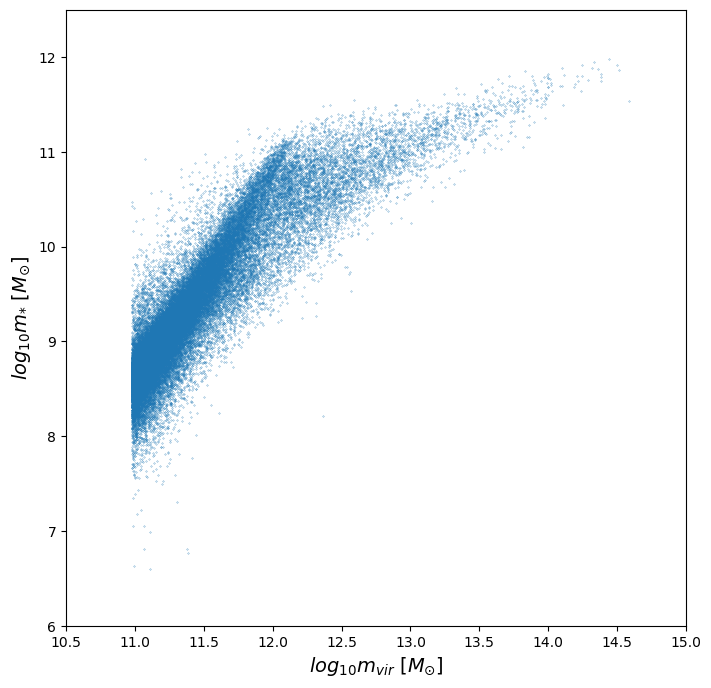

In [20]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.log10(galprop_cen['mhalo'] * 1e9), np.log10(galprop_cen['mstar'] * 1e9), s = 0.05)
plt.xlabel('$log_{10} m_{vir}$ [$M_{\odot}$]', fontsize=14)
plt.xlim(10.5, 15)
plt.ylabel('$log_{10} m_{*}$ [$M_{\odot}$]', fontsize=14)
plt.ylim(6, 12.5)